In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from nltk.stem.isri import ISRIStemmer
from sklearn.preprocessing import FunctionTransformer
import spacy
import json
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



#data/training visualization
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
def remove_stopwords(X, y=None):
    stop_words = set(stopwords.words('english'))
    X_processed = []
    for doc in X:
        words = doc.split()
        words = [word for word in words if word not in stop_words]
        X_processed.append(' '.join(words))
    if y is not None:
        return X_processed, y
    else:
        return X_processed

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
articles = []
with open('/content/drive/MyDrive/Dataset.csv') as file:
  articles = file

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset.csv')

In [ ]:
df.head()
X = df['review']
y = df['sentiment']

### Classification Algorithm List

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=142)

# 4.Logistic Regression 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8804897959183674


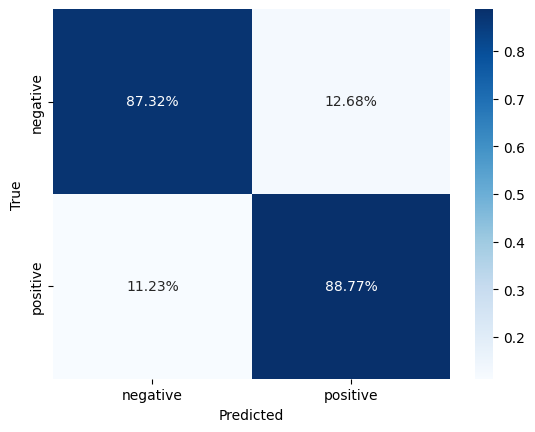

In [ ]:

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),    # Vectorize the text data
    ('classifier', LogisticRegression(max_iter=86)), 
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict the sentiment labels of the test data
y_pred = pipeline.predict(X_test)


accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

y_pred = pipeline.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2%', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()






# 4.1 RandomForestClassifier 

Accuracy: 0.8558367346938776
------------------------------------------------------
------------------------------------------------------


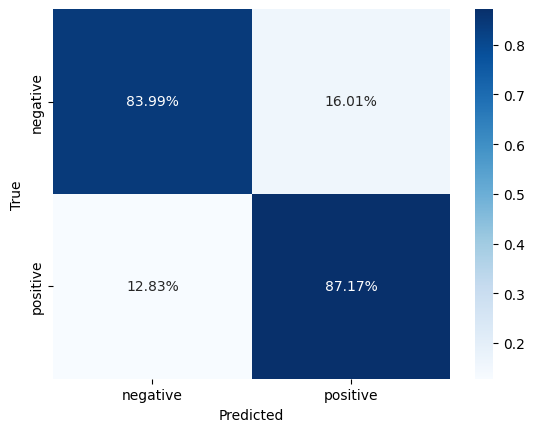

------------------------------------------------------
------------------------------------------------------


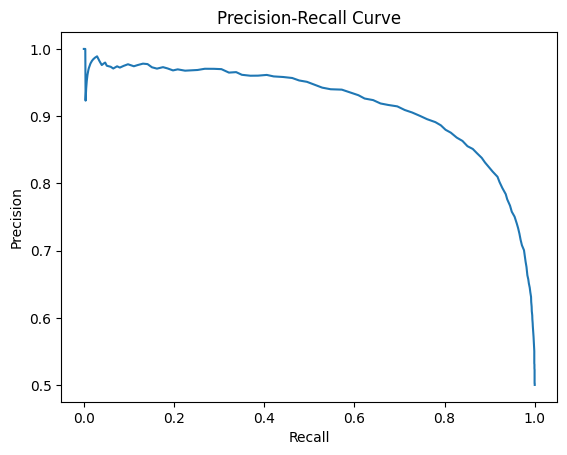

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=185))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test set
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)
print('------------------------------------------------------')
print('------------------------------------------------------')
# Predict the sentiment labels of the test data
y_pred = pipeline.predict(X_test)


cm = confusion_matrix(y_test, y_pred, normalize='true')


sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2%', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Compute precision-recall pairs for different probability thresholds
y_pred_proba = pipeline.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])
print('------------------------------------------------------')
print('------------------------------------------------------')
# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



In [ ]:
from sklearn.model_selection import cross_val_score

# Create a list of classifiers to compare
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
]

# Iterate over the classifiers and compute the cross-validation scores
for clf in classifiers:
    pipeline = Pipeline([
        ('stopwords', FunctionTransformer(remove_stopwords)),
        ('vectorizer', CountVectorizer()),    # Vectorize the text data
        ('classifier', clf), # Train a classifier
    ])
    
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    print(f'{clf.__class__.__name__} - Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression - Accuracy: 0.875 (+/- 0.011)
RandomForestClassifier - Accuracy: 0.846 (+/- 0.006)
